In [0]:
from sklearn.datasets import load_iris
import pandas as pd

In [0]:
data=load_iris()

In [3]:
data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [0]:
X=data['data']
y=data['target']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
trainx,testx,trainy,testy=train_test_split(X,y)

In [7]:
trainx.shape

(112, 4)

In [8]:
trainy.shape

(112,)

#Random Weights Initializer and Zero Bias Initializer

In [0]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.initializers import Zeros,RandomNormal
from tensorflow.keras.models import Model

In [0]:
input_layer=Input(shape=trainx.shape[1:])

In [0]:
dense_layer=Dense(64,kernel_initializer=RandomNormal(seed=13),bias_initializer=Zeros(),activation='relu')(input_layer)

In [0]:
classification_layer=Dense(3,activation='softmax')(dense_layer)

In [0]:
model=Model(input_layer,classification_layer)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
history=model.fit(trainx,trainy,epochs=50,validation_split=0.1)

Epoch 1/50
4/4 [==============================] - 0s 10ms/step - loss: 0.8082 - accuracy: 0.6600 - val_loss: 0.8690 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8088 - accuracy: 0.6600 - val_loss: 0.8466 - val_accuracy: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7971 - accuracy: 0.6600 - val_loss: 0.8230 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 9ms/step - loss: 0.7626 - accuracy: 0.6900 - val_loss: 0.8012 - val_accuracy: 0.7500
Epoch 5/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7227 - accuracy: 0.7900 - val_loss: 0.7873 - val_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7159 - accuracy: 0.7200 - val_loss: 0.7853 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.7103 - accuracy: 0.6600 - val_loss: 0.7841 - val_accuracy: 0.5000
Epoch 8/50
4/4 [=============

In [26]:
model.evaluate(testx,testy)

2/2 [==============================] - 0s 3ms/step - loss: 0.3636 - accuracy: 0.9737


[0.3635660409927368, 0.9736841917037964]

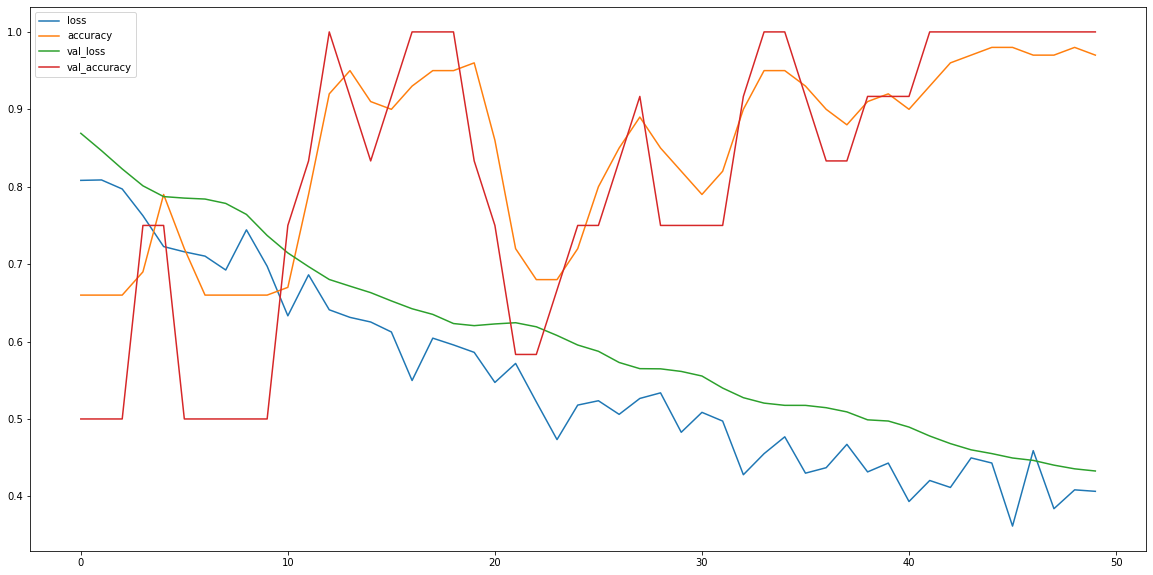

In [39]:
pd.DataFrame(history.history).plot(kind='line',figsize=(20,10))

#Zero Weight Initialization and Random Bias Initialization

In [0]:
input_layer=Input(shape=(trainx.shape[1:]))

In [0]:
dense_layer=Dense(64,kernel_initializer=Zeros(),bias_initializer=RandomNormal())(input_layer)

In [0]:
model_output=Dense(3,activation='softmax')(dense_layer)

In [0]:
model=Model(input_layer,model_output)

In [49]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Epoch 1/50
4/4 [==============================] - 0s 23ms/step - loss: 1.0944 - accuracy: 0.4000 - val_loss: 1.0539 - val_accuracy: 0.5833
Epoch 2/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0401 - accuracy: 0.4500 - val_loss: 1.0411 - val_accuracy: 0.2500
Epoch 3/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0242 - accuracy: 0.3400 - val_loss: 1.0251 - val_accuracy: 0.2500
Epoch 4/50
4/4 [==============================] - 0s 8ms/step - loss: 1.0030 - accuracy: 0.3400 - val_loss: 0.9939 - val_accuracy: 0.2500
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9924 - accuracy: 0.3500 - val_loss: 0.9663 - val_accuracy: 0.2500
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9014 - accuracy: 0.5600 - val_loss: 0.9485 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 8ms/step - loss: 0.8939 - accuracy: 0.6600 - val_loss: 0.9563 - val_accuracy: 0.5000
Epoch 8/50
4/4 [=================

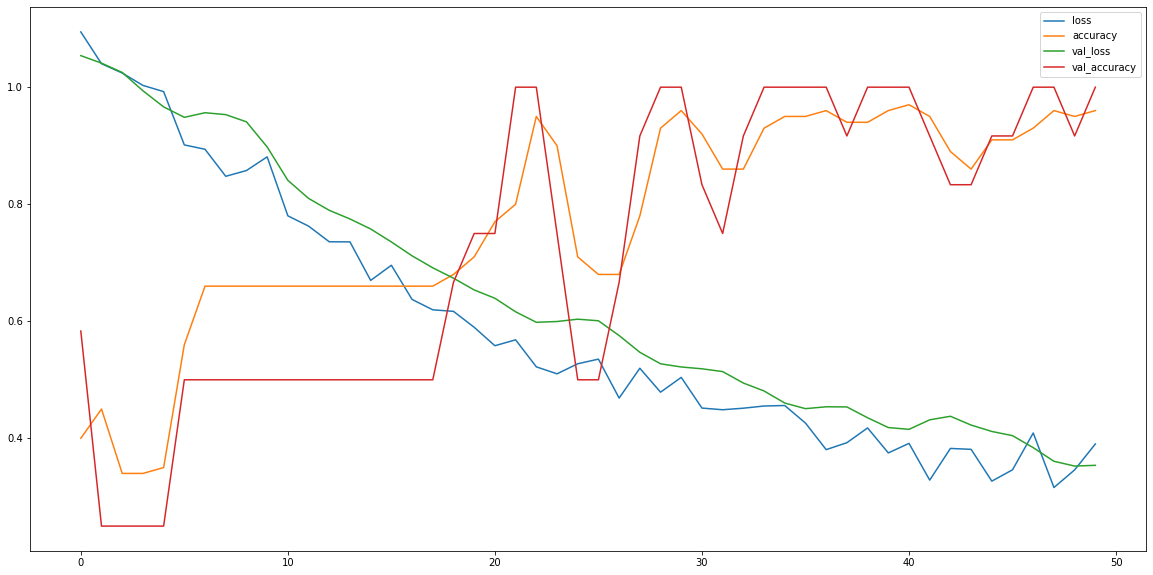

In [51]:
history=model.fit(trainx,trainy,epochs=50,validation_split=0.1)
pd.DataFrame(history.history).plot(kind='line',figsize=(20,10))

In [52]:
model.evaluate(testx,testy)

2/2 [==============================] - 0s 3ms/step - loss: 0.2973 - accuracy: 0.9737


[0.29725179076194763, 0.9736841917037964]